### **KMeans Clustering**





In [1]:
from sklearn.datasets import make_blobs
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris=datasets.load_iris()
iris
x=iris.data

print('X shape = \n', x.shape)

f1=iris.data[:,:1]
f2=iris.data[:,1:2]

# f2=np.reshape(f2, (len(f2),1))
# print(f2)
x=np.concatenate((f1,f2),axis=1)

print("\nIris Data = \n", iris.data[:5])
print("\nx = \n", x[:5])

X shape = 
 (150, 4)

Iris Data = 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

x = 
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


#### **Plot Data Points on 2D Plane**

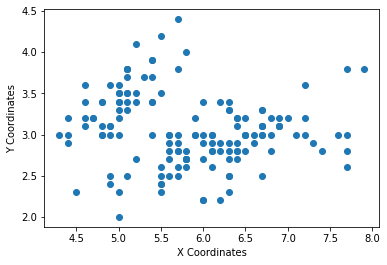

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
#They are frequently used in interactive environments like jupyter notebook. %matplotlib inline makes your plot outputs appear and be stored within the notebook.
plt.scatter(x[:, 0], x[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

#### **Find Clusters using Elbow Method**

In [4]:
# !pip install yellowbrick

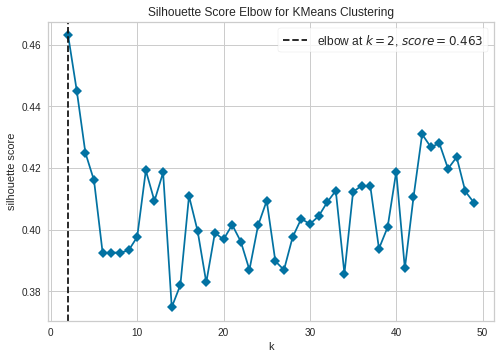

In [5]:
from sklearn.cluster import KMeans
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visulizer = KElbowVisualizer(model, k=(2,50), metric='silhouette', timings=False)

# Fit the data and visualize
visulizer.fit(x)
visulizer.poof()

#### **Use of KMeans-Clustering with clusters=2**

In [6]:
# Specify the number of clusters (2) and fit the data X
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

In [7]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

In [8]:
# Get the cluster labels which shows that which point in which cluster
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

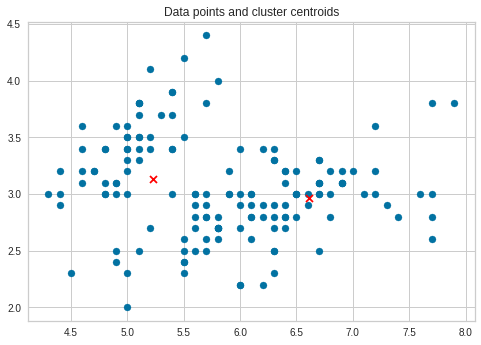

In [9]:
# ploting cluster centers and the data points on a 2D plane
plt.scatter(x[:, 0], x[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', marker='x')

plt.title('Data points and cluster centroids')
plt.show()

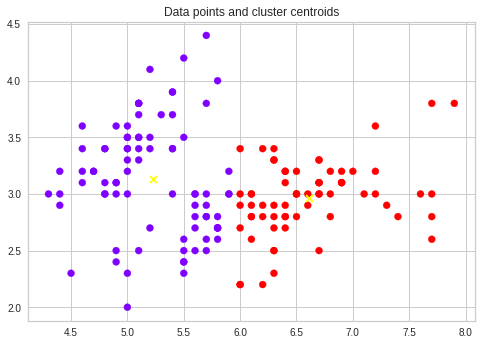

In [10]:
# ploting cluster centers and the data points on a 2D plane
plt.scatter(x=x[:, 0], y=x[:, -1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c=['yellow'], marker='x')

plt.title('Data points and cluster centroids')
plt.show()

#### **Calculate Silhouette Score**

In [11]:
#calculate silhouette_score
from sklearn.metrics import silhouette_score
print("Silhouette Score = ", silhouette_score(x, kmeans.labels_))

Silhouette Score =  0.4629549773635977
